In [3]:
from ISLP import load_data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar datos igual que en la primer entrega
NCI60 = load_data('NCI60')
nc_data = NCI60['data']
nc_labels = NCI60['labels']

# Igual que en la primer entrega estandarizo los datos
scaler_nci = StandardScaler()
X_nci_scaled = scaler_nci.fit_transform(nc_data)



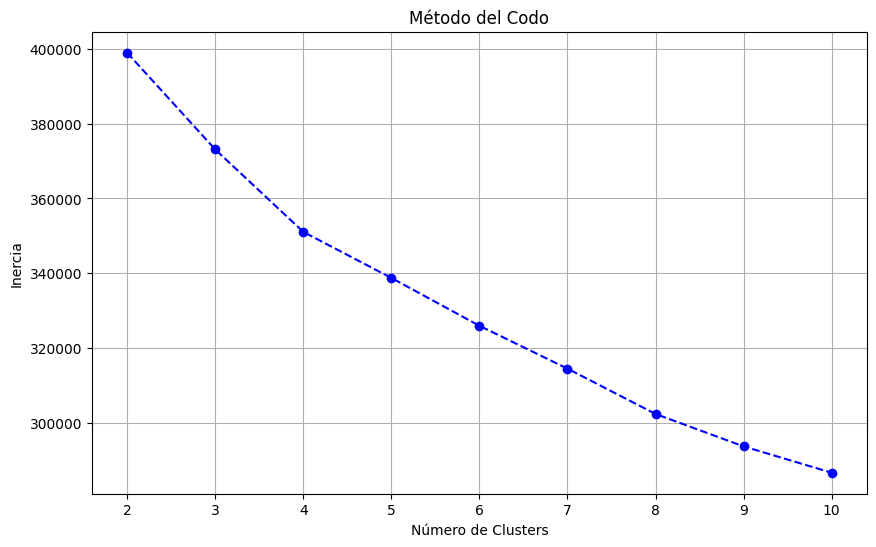

In [9]:
# Método del Codo
inercias = []
rango_k = range(2, 11) 

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=19, n_init=10)
    kmeans.fit(X_nci_scaled)
    inercias.append(kmeans.inertia_)

# Grafica
plt.figure(figsize=(10, 6))
plt.plot(rango_k, inercias, marker='o', linestyle='--', color='blue')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

Probando el metodo del codo se ve que el valor 4 es el valor de quiebre, aunque es sutil en la grafica.

In [19]:
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import adjusted_rand_score
import pandas as pd
import numpy as np

#
k = 4

# K-MEANS
kmeans = KMeans(n_clusters=k, random_state=19, n_init=10)
labels_kmeans = kmeans.fit_predict(X_nci_scaled)

# PAM con Manhattan
pam = KMedoids(n_clusters=k, metric='manhattan', init='k-medoids++', random_state=19)
labels_pam = pam.fit_predict(X_nci_scaled)

# COMPARACIÓN usando Rand Ajustado
ari = adjusted_rand_score(labels_kmeans, labels_pam)


print(f"Índice de Rand Ajustado {ari:.4f}")



Índice de Rand Ajustado 0.6659


El indice de Rand Ajusstado nos da 0.67 lo que indica que los modelos difieren un poco pero aun asi son capaces de agrupar los datos de manera similar.

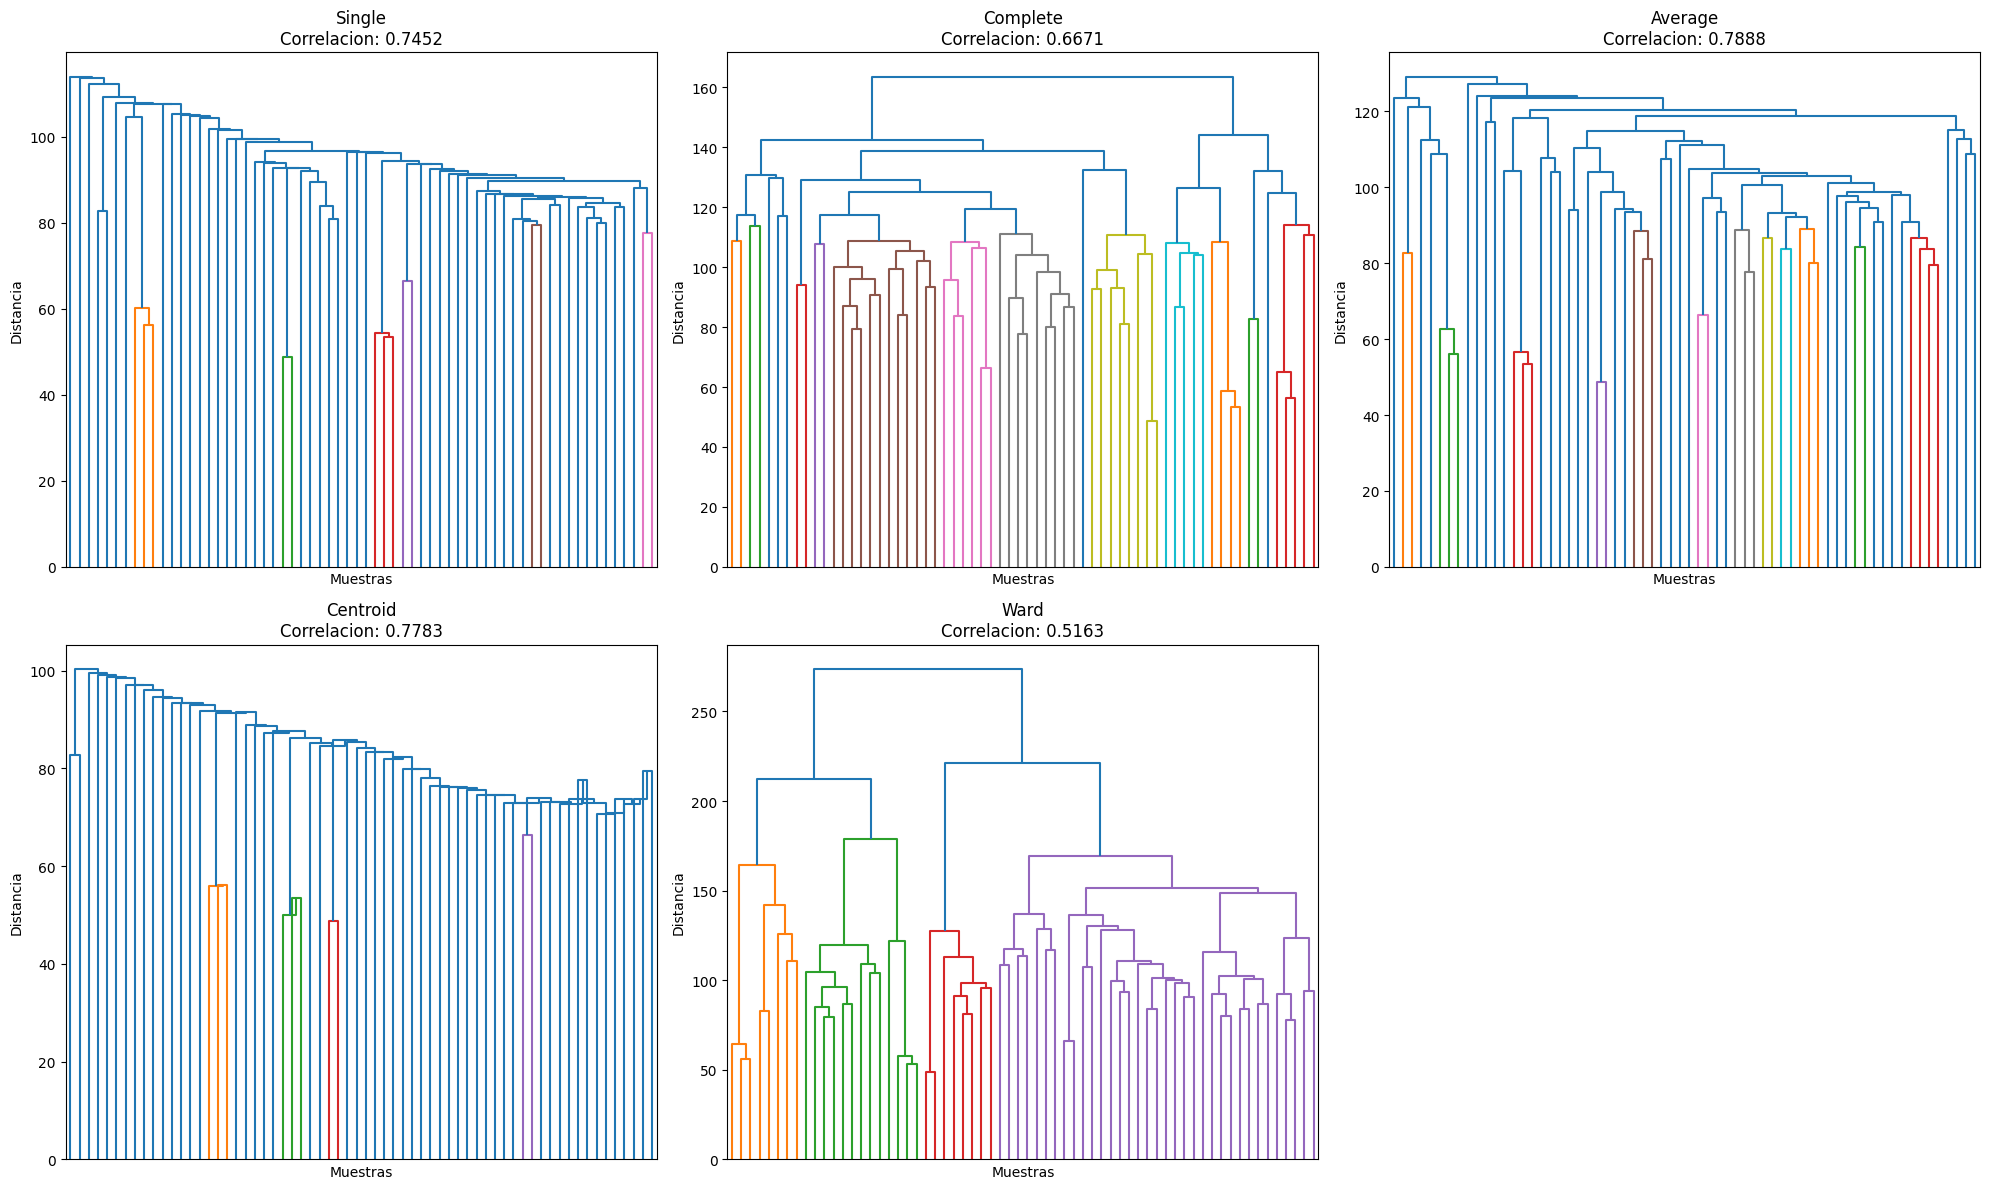

Resultados de Ajuste
- Single    : 0.7452
- Complete  : 0.6671
- Average   : 0.7888
- Centroid  : 0.7783
- Ward      : 0.5163


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

metodos = ['single', 'complete', 'average', 'centroid', 'ward']

distancias_originales = pdist(X_nci_scaled, metric='euclidean')

plt.figure(figsize=(20, 12))
resultados_cofeneticos = {}


for i, metodo in enumerate(metodos):
    Z = linkage(X_nci_scaled, method=metodo, metric='euclidean')
    c, _ = cophenet(Z, distancias_originales)
    resultados_cofeneticos[metodo] = c
    
    # Graficar Dendrograma
    plt.subplot(2, 3, i + 1)
    dendrogram(Z, no_labels=True)
    plt.title(f'{metodo.capitalize()}\nCorrelacion: {c:.4f}')
    plt.xlabel('Muestras')
    plt.ylabel('Distancia')

plt.tight_layout()
plt.show()

# Mostrar el ganador
print("Resultados de Ajuste")
mejor_metodo = max(resultados_cofeneticos, key=resultados_cofeneticos.get)

for metodo, score in resultados_cofeneticos.items():
    print(f"- {metodo.capitalize():<10}: {score:.4f}")


El método Average obtuvo el mejor coeficiente de correlación (0.79), indicando que es el que respeta más fielmente las distancias originales entre las muestras. Por el contrario, el método Ward obtuvo el peor coeficiente (0.52).